In [79]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
pd.set_option('display.max_columns', None)
song_data = pd.read_csv('data/playlists-v4-final.csv', skip_blank_lines = True)
song_data.dropna(inplace = True)
song_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_title,popularity_scores,genre
0,0.817,0.509,0,-4.170,1,0.0839,0.1460,0.000025,0.1110,0.770,99.988,3XEdqQtGHAM5huMrs3RaKN,183930,4,Acid Dreams,55,dance pop
1,0.724,0.846,9,-3.785,0,0.0538,0.1090,0.000000,0.0958,0.640,129.959,2tVkFxyePqB0o4Y4SYKV0Q,187251,4,Breath,47,k-pop
2,0.749,0.535,4,-6.785,1,0.0336,0.0131,0.000036,0.0982,0.601,123.042,0ClPIeT6MSgfSgQ9ZrJbAq,196607,4,Cheating on You,77,dance pop
3,0.774,0.959,1,-2.907,1,0.1830,0.1130,0.000000,0.0902,0.860,114.989,5UCTT2liT61iPL2cCV9Gto,210535,4,CHERRY,43,k-pop
4,0.961,0.739,9,-6.665,1,0.2240,0.0794,0.000000,0.0372,0.759,119.960,34JfHOd0fcefm4FSPSrIhF,150053,4,Cold Blooded,65,k-pop


# Exploratory Data Analysis

In [81]:
#changing column milliseconds to seconds
song_data = song_data.rename(columns = {'duration_ms' : 'seconds'})
song_data['seconds'] = song_data['seconds'].apply(lambda x: round(x / 1000))
song_data['seconds']

0       184
1       187
2       197
3       211
4       150
       ... 
8180    197
8181    313
8182    218
8183    182
8184    168
Name: seconds, Length: 7553, dtype: int64

In [82]:
# adding in ratings of popularity to group into 3 different buckets
# >= 70: popular, <70 and >=50: moderate: <50: unpopular
def popularity_rating(number):
    if number >= 70:
        return 'very'
    elif number >= 50: 
        return 'moderatly'
    else:
        return 'unpopular'

In [83]:
song_data['rating'] = song_data['popularity_scores'].apply(popularity_rating)

In [84]:
song_data['rating'].value_counts()

unpopular    4261
moderatly    2370
very          922
Name: rating, dtype: int64

In [85]:
target = song_data['rating']
target

0       moderatly
1       unpopular
2            very
3       unpopular
4       moderatly
          ...    
8180         very
8181         very
8182    unpopular
8183         very
8184         very
Name: rating, Length: 7553, dtype: object

In [86]:
# Just all features
features = song_data.drop(columns=['rating','id', 'song_title', 'popularity_scores', 'genre'])
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,seconds,time_signature
0,0.817,0.509,0,-4.170,1,0.0839,0.1460,0.000025,0.1110,0.770,99.988,184,4
1,0.724,0.846,9,-3.785,0,0.0538,0.1090,0.000000,0.0958,0.640,129.959,187,4
2,0.749,0.535,4,-6.785,1,0.0336,0.0131,0.000036,0.0982,0.601,123.042,197,4
3,0.774,0.959,1,-2.907,1,0.1830,0.1130,0.000000,0.0902,0.860,114.989,211,4
4,0.961,0.739,9,-6.665,1,0.2240,0.0794,0.000000,0.0372,0.759,119.960,150,4


In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scalers = [MinMaxScaler(), StandardScaler()]

for i in range(len(scalers)):

    #create the scaler
    scaler = scalers[i]

    #fit the scaler to the training data(just features)
    scaler.fit(features) 

    if i == 0:
        standard_scaled = scaler.transform(features)
    elif i == 1:
        minmax_scaled = scaler.transform(features)

In [88]:
# New dataframe for all the scaled features
features_standard_scaled = pd.DataFrame(standard_scaled, columns = features.columns)
features_standard_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,seconds,time_signature
0,0.822903,0.509877,0.000000,0.876783,1.0,0.082173,0.146585,0.000025,0.095347,0.767034,0.354157,0.033516,0.75
1,0.721860,0.847651,0.818182,0.885918,0.0,0.041492,0.109437,0.000000,0.079560,0.633028,0.518248,0.034200,0.75
2,0.749022,0.535936,0.363636,0.814735,1.0,0.014191,0.013151,0.000037,0.082052,0.592825,0.480378,0.036480,0.75
3,0.776184,0.960910,0.090909,0.906751,1.0,0.216110,0.113453,0.000000,0.073743,0.859808,0.436287,0.039672,0.75
4,0.979357,0.740405,0.818182,0.817582,1.0,0.271523,0.079718,0.000000,0.018695,0.755695,0.463504,0.025764,0.75


In [89]:
features_minmax_scaled = pd.DataFrame(minmax_scaled, columns = features.columns)
features_minmax_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,seconds,time_signature
0,1.346552,-0.326595,-1.475894,0.823422,0.756244,0.044901,-0.675732,-0.444737,-0.489562,0.972286,-0.661378,-0.382322,0.319632
1,0.819528,0.985983,1.073967,0.894354,-1.322325,-0.321221,-0.784200,-0.444823,-0.598222,0.485425,0.333874,-0.359170,0.319632
2,0.961201,-0.225328,-0.342622,0.341634,0.756244,-0.566924,-1.065337,-0.444700,-0.581065,0.339366,0.104180,-0.281996,0.319632
3,1.102874,1.426106,-1.192576,1.056117,0.756244,1.250306,-0.772474,-0.444823,-0.638255,1.309345,-0.163237,-0.173952,0.319632
4,2.162590,0.569230,1.073967,0.363743,0.756244,1.749010,-0.870975,-0.444823,-1.017137,0.931090,0.001836,-0.644715,0.319632


In [90]:
from sklearn.model_selection import train_test_split

#split data into training and testing sets
def split_data(features, target):

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)
    
    return X_train, X_test, y_train, y_test

In [91]:
X_train, X_test, y_train, y_test = split_data(features, target)

In [92]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Uses a Decision Tree Classifier to eliminate features that have little to no effect on the target variable
select = RFE(DecisionTreeClassifier(random_state = 3000), n_features_to_select = 6)

In [93]:
#fit the RFE selector to the training data
select.fit(X_train, y_train)

#transform training and testing sets so only the selected features are retained
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [94]:
# determines which of the features were deemed as most important
rfe_columns = []
for i in range(len(select.get_support())):
    if select.get_support()[i] == True:
        rfe_columns.append(features.columns[i])

In [95]:
# 6 chosen features
rfe_columns

['danceability', 'energy', 'speechiness', 'acousticness', 'valence', 'tempo']

## Dataframes with the Selected Features

In [96]:
# Dictionary with features both scaled and unscaled to evaluate the performance
all_data = {'UNSCALED FEATURES' : features, 'STANDARD SCALER' : features_standard_scaled,
            'MINMAX SCALER' : features_minmax_scaled}

In [97]:
# Removes the unused features from the dataframe
features = features[rfe_columns]
features_standard_scaled = features_standard_scaled[rfe_columns]
features_minmax_scaled = features_minmax_scaled[rfe_columns]

#creating sample dataframe with samller set of selected features to visualize data
sample_song_data = song_data.sample(frac = 0.05, random_state = 3000)

## Data Exploration

### Visual EDA

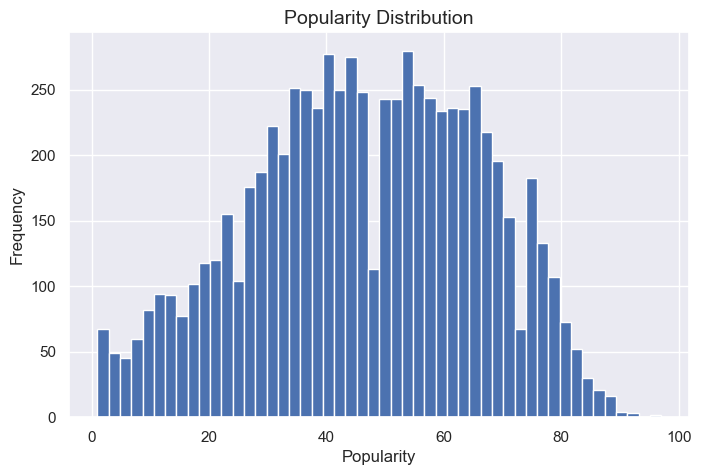

In [169]:
song_data = pd.read_csv('data/playlists-v4-final.csv')

# Create the sorted dataframe, drop zeros, convert any categoricals
sort_data = song_data.sort_values('popularity_scores', ascending=False).reset_index()
ordered = sort_data.drop(['index', 'genre', 'id'], axis=1)
ordered.index = ordered.index + 1
ordered = ordered[ordered.popularity_scores > 0]

ordered[['mode', 'key', 'time_signature']] = \
    ordered[['mode', 'key', 'time_signature']].astype('category')
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = ordered['popularity_scores'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)

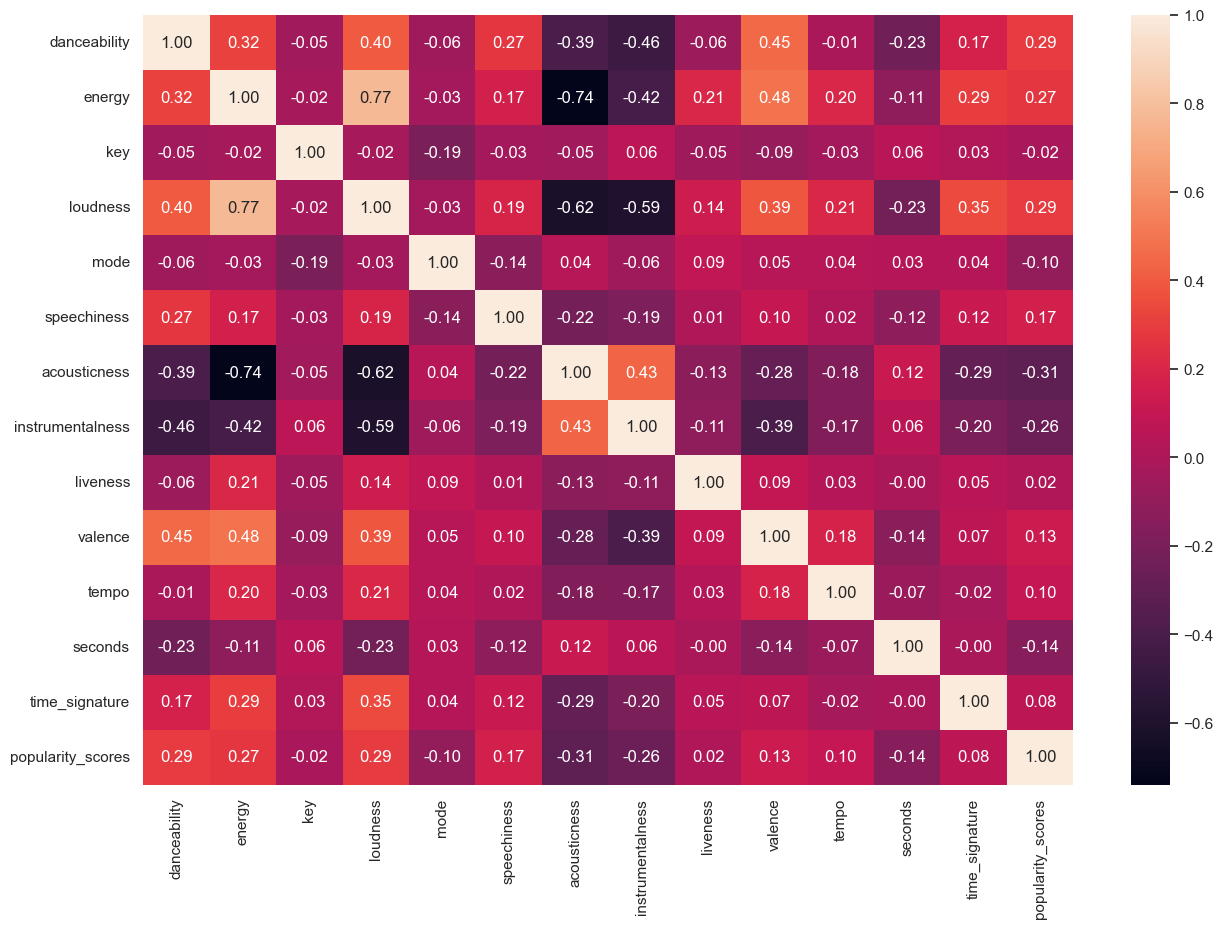

In [164]:
# This correlation chart gave us an easy way to show the correlations 
# between all the variables. It is color coded by relationship of each 
# correlation. What's interesting is that there are very weak positive 
# and negative correlations between most of the variables. However, it's 
# interesting to note that loudness and energy have a strong positive 
# correlation at 0.77.

# correlation chart with all variables - features + target
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(sample_song_data.corr(), annot=True, fmt=".2f",);

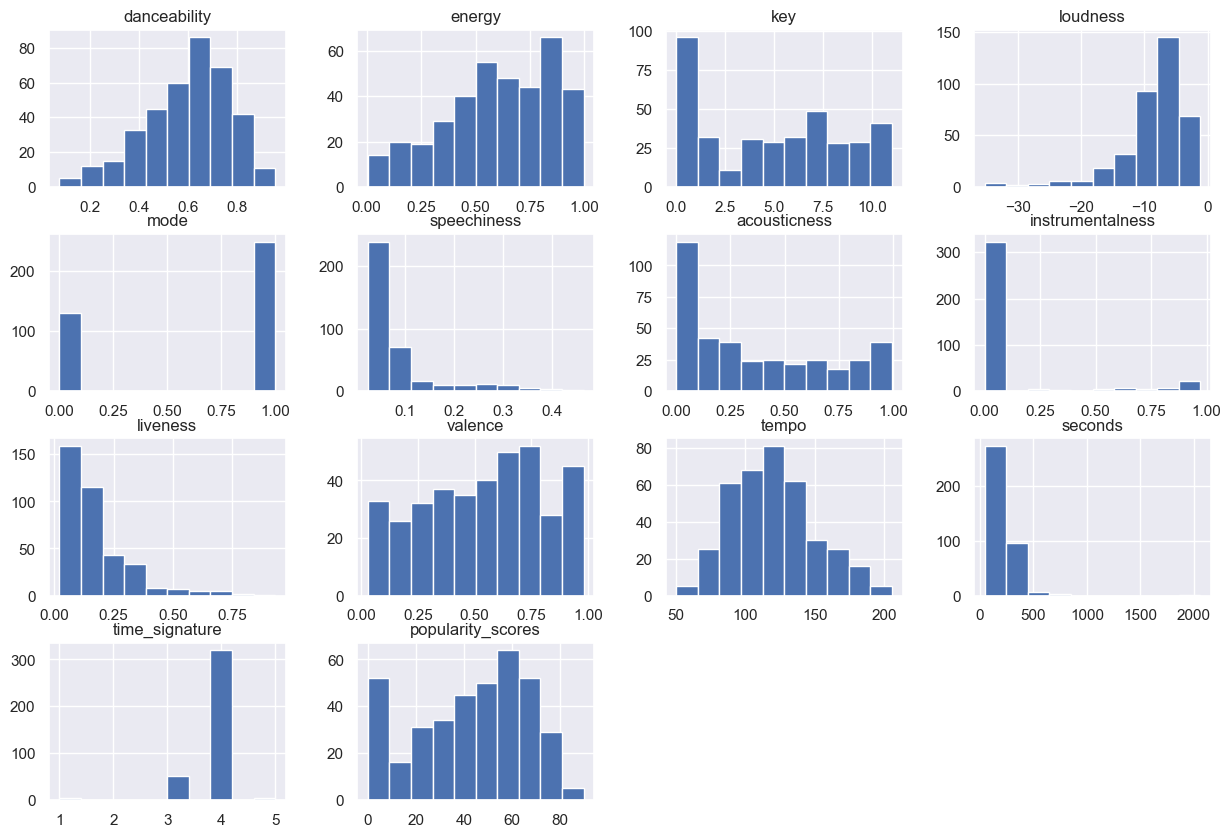

In [165]:
sample_song_data.hist();

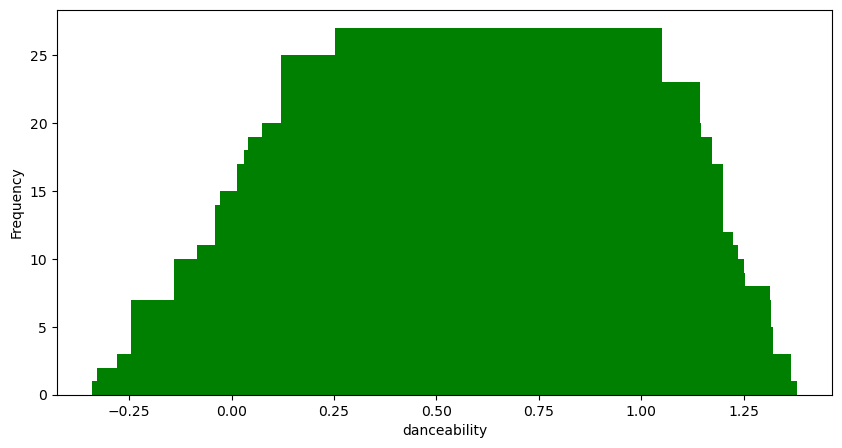

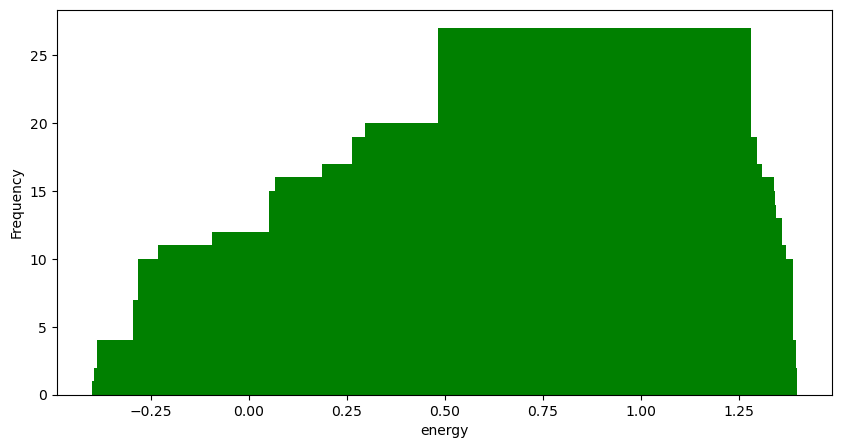

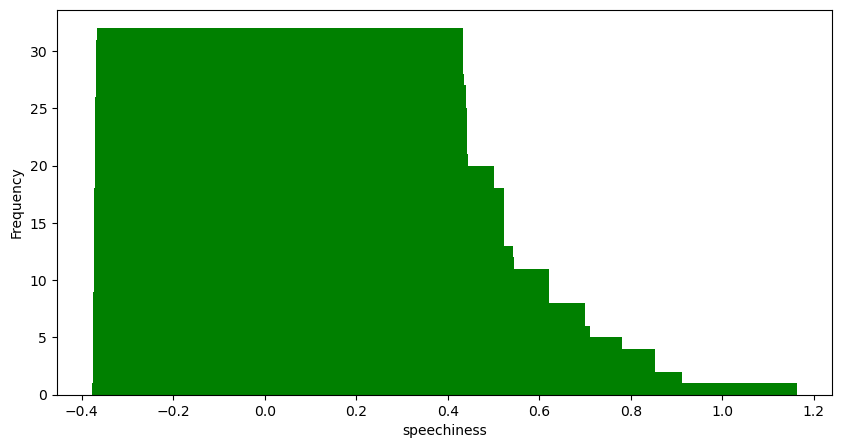

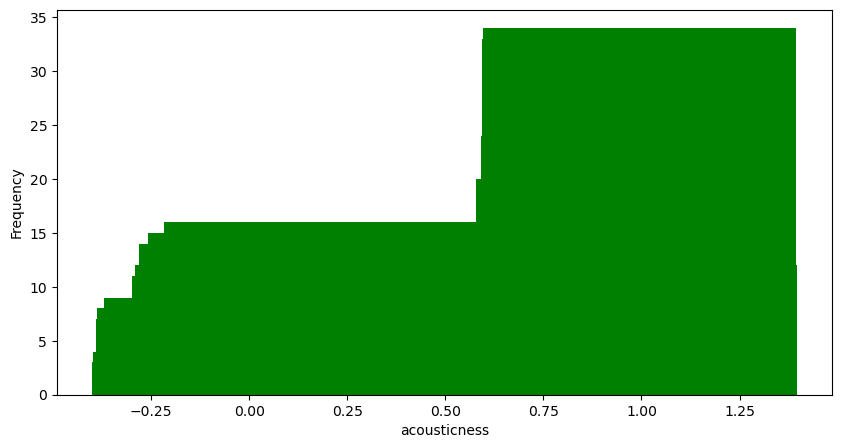

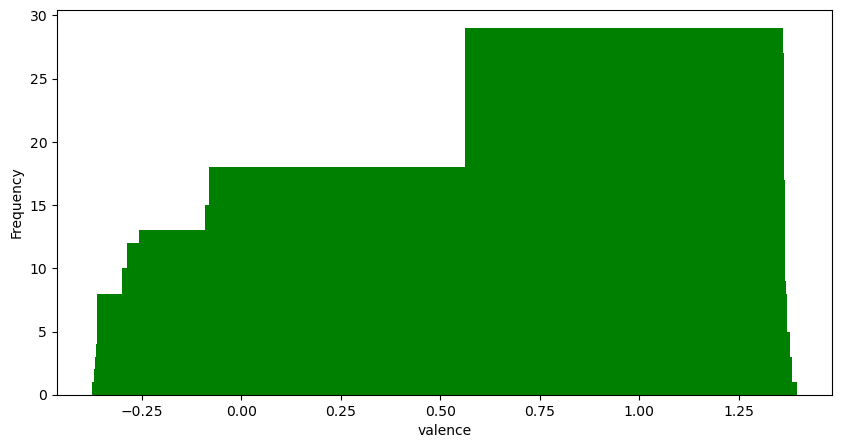

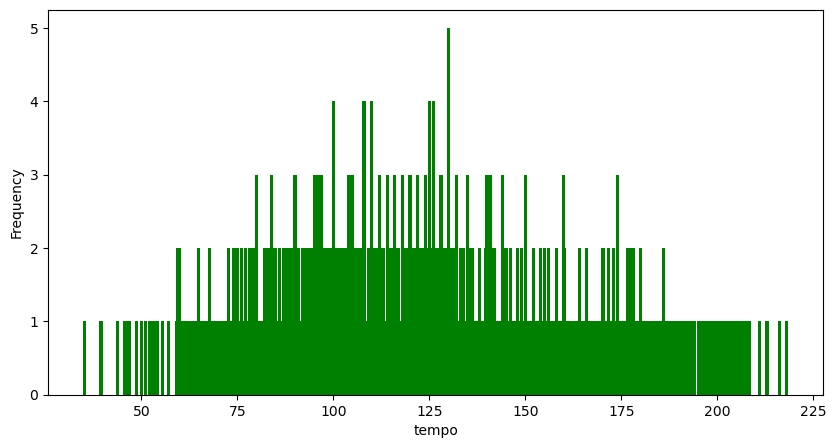

In [100]:
#plotting frequencies against variables
 
def plot_bar_graph(variable):
    plot= song_data[variable]
    plot_value= plot.value_counts()
    plt.figure(figsize=(10,5))
    plt.bar(plot_value.index, plot_value, color="g")
    plt.ylabel("Frequency")
    plt.xlabel(variable)
    plt.show()

bar_plots = rfe_columns
for i in bar_plots:
    plot_bar_graph(i)

### Lower speechiness seems better for popularity
### Higher loudness seems better for popularity
### Acousticness, instrumentalness, valence, energy and danceability features are not helpful 

<AxesSubplot:xlabel='popularity_scores', ylabel='valence'>

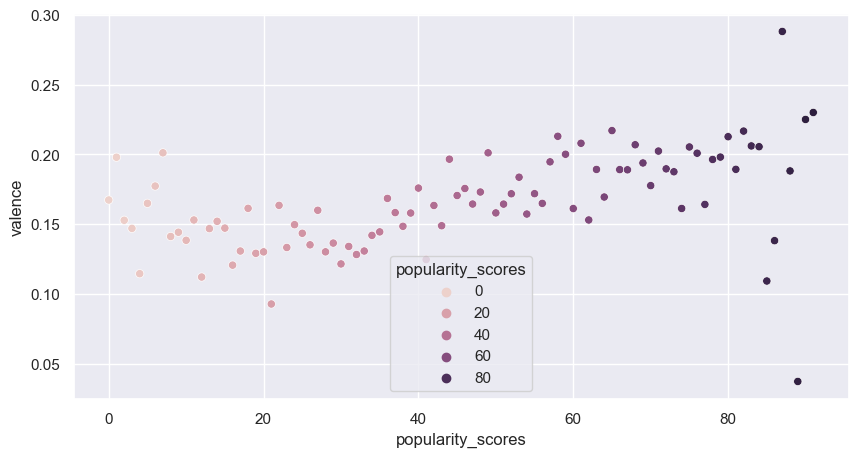

In [166]:
#Check valence less or equal than 0.3 to see if more sad or angry songs are more popular
sns.set(rc={'figure.figsize':(10,5)})
data_low_val = song_data.query('valence<=0.3')
sns.scatterplot(data = data_low_val.groupby(by = 'popularity_scores').mean().reset_index(), x = 'popularity_scores', y = 'valence',
                hue = 'popularity_scores')

### Wasn't helpful

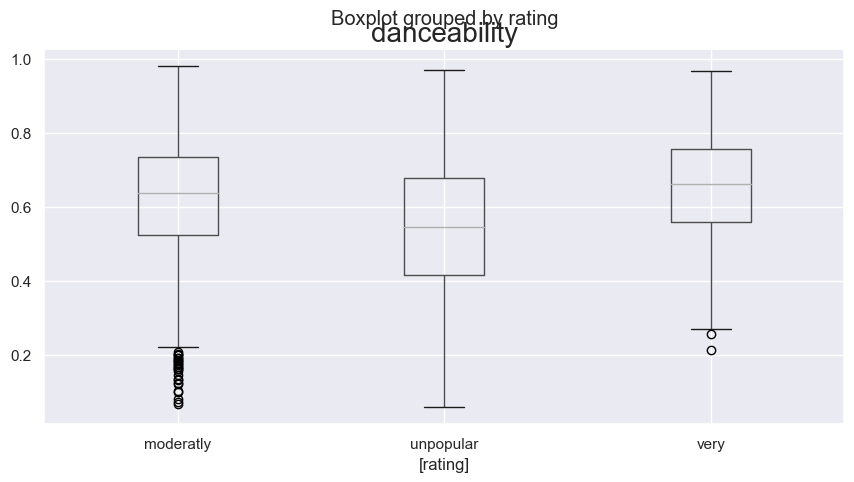

<Figure size 600x600 with 0 Axes>

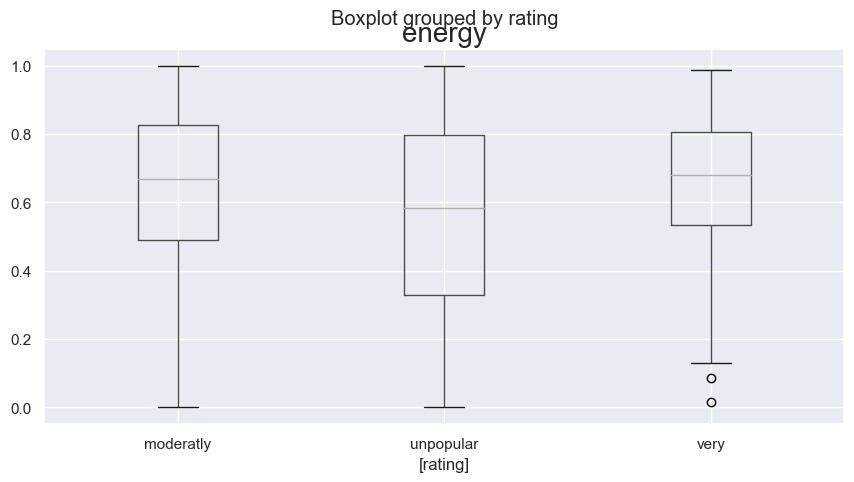

<Figure size 600x600 with 0 Axes>

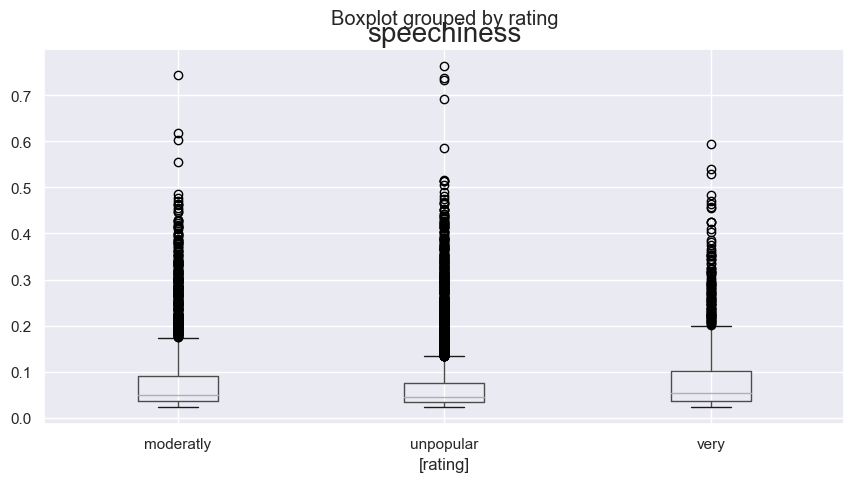

<Figure size 600x600 with 0 Axes>

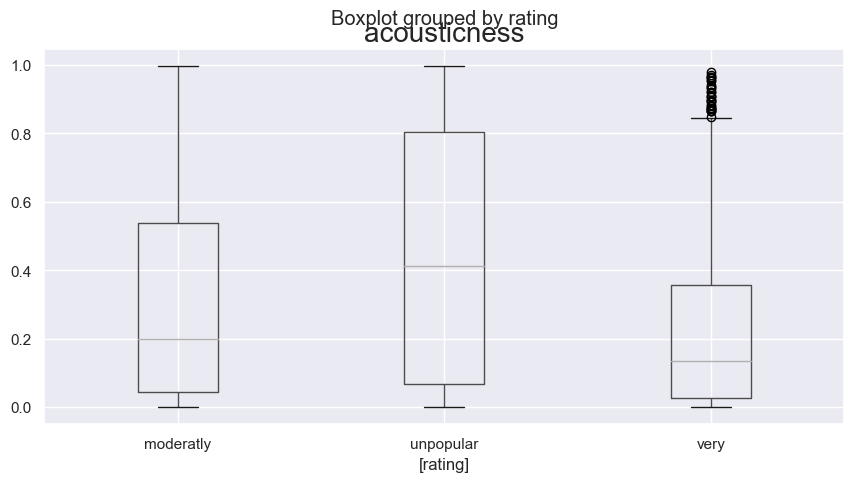

<Figure size 600x600 with 0 Axes>

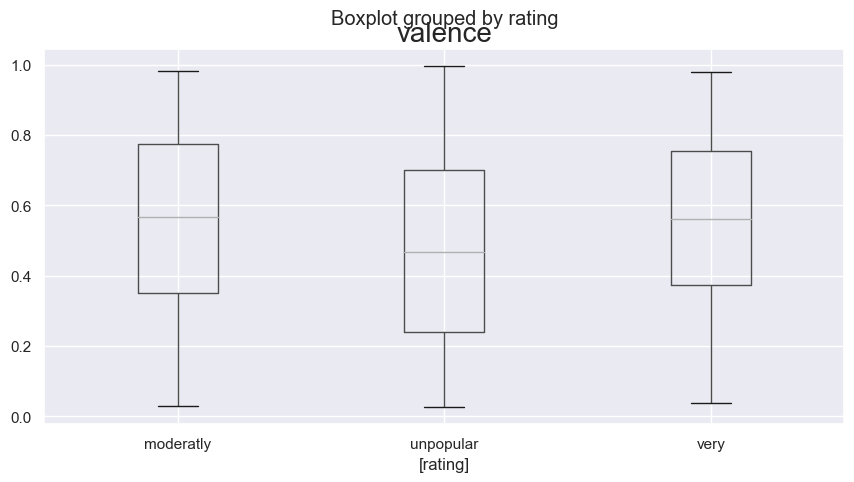

<Figure size 600x600 with 0 Axes>

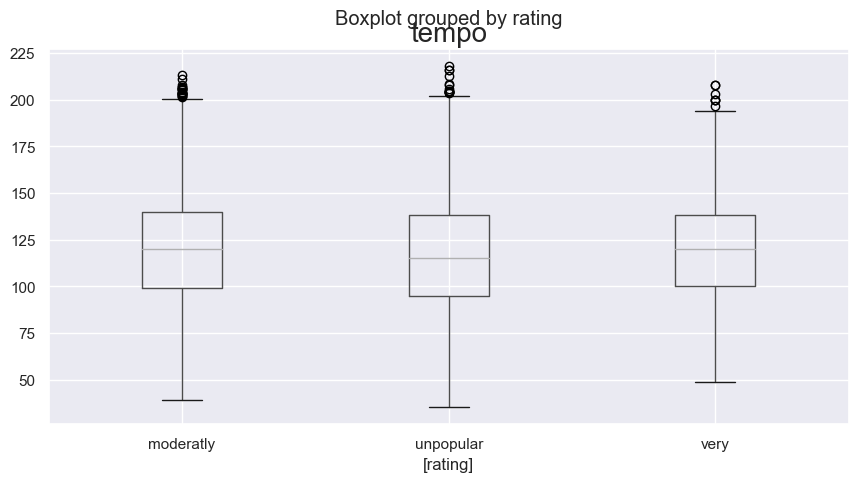

<Figure size 600x600 with 0 Axes>

In [167]:
# The boxplots allowed for an enhanced understanding about the spread of 
# the data for the individual features and how they compare to the other 
# target variables. The data points for each target variable- very, moderately, 
# and unpopular had fairly similar distributions for each of the target 
# variables included in the analysis.

box_plots = rfe_columns
def popularity_var(variable):
    graph = song_data.boxplot(column = [variable], by=['rating'])
    plt.title(variable, fontsize=20)
    plt.figure(figsize=(6,6))
    plt.show()
for i in box_plots:
    popularity_var(i)


In [102]:
song_data_numbers = song_data.drop(columns=['id', 'song_title', 'genre'])
song_data_numbers.groupby('rating').agg(['count', 'mean', 'std', 'sem'])

danceability                               energy            \
                 count      mean       std       sem  count      mean   
rating                                                                  
moderatly         2370  0.621300  0.155099  0.003186   2370  0.640228   
unpopular         4261  0.540369  0.183582  0.002812   4261  0.552243   
very               922  0.651945  0.144112  0.004746    922  0.658744   

                                key                               loudness  \
                std       sem count      mean       std       sem    count   
rating                                                                       
moderatly  0.221679  0.004554  2370  5.220253  3.557584  0.073077     2370   
unpopular  0.279976  0.004289  4261  5.200892  3.510950  0.053786     4261   
very       0.184032  0.006061   922  5.220174  3.548991  0.116880      922   

                                         mode                                \
               mean       std       sem count      mean       std       sem   
rating                                                                        
moderatly -7.380346  4.300297  0.088333  2370  0.659494  0.473979  0.009736   
unpopular -9.774383  6.090380  0.093302  4261  0.628256  0.483327  0.007404   
very      -6.629572  2.894585  0.095328   922  0.612798  0.487375  0.016051   

          speechiness                               acousticness            \
                count      mean       std       sem        count      mean   
rating                                                                       
moderatly        2370  0.084992  0.085845  0.001763         2370  0.309447   
unpopular        4261  0.075507  0.078564  0.001204         4261  0.445999   
very              922  0.089642  0.087604  0.002885          922  0.227691   

                              instrumentalness                                \
                std       sem            count      mean       std       sem   
rating                                                                         
moderatly  0.298722  0.006136             2370  0.049624  0.185065  0.003801   
unpopular  0.361951  0.005545             4261  0.200497  0.349124  0.005348   
very       0.250332  0.008244              922  0.021219  0.104297  0.003435   

          liveness                               valence                      \
             count      mean       std       sem   count      mean       std   
rating                                                                         
moderatly     2370  0.178042  0.135798  0.002789    2370  0.558070  0.254608   
unpopular     4261  0.180055  0.140043  0.002145    4261  0.474309  0.273513   
very           922  0.180538  0.149393  0.004920     922  0.554526  0.241064   

                    tempo                                  seconds  \
                sem count        mean        std       sem   count   
rating                                                               
moderatly  0.005230  2370  121.840151  29.589132  0.607796    2370   
unpopular  0.004190  4261  118.496133  30.864453  0.472828    4261   
very       0.007939   922  121.439463  27.523820  0.906449     922   

                                            time_signature            \
                 mean         std       sem          count      mean   
rating                                                                 
moderatly  223.557384   58.145095  1.194370           2370  3.834599   
unpopular  242.950716  164.693699  2.523023           4261  3.826332   
very       215.710412   50.537090  1.664350            922  3.908894   

                              popularity_scores                        \
                std       sem             count       mean        std   
rating                                                                  
moderatly  0.507089  0.010416              2370  59.244304   5.753247   
unpopular  0.527080  0.008075              4261  2

# Model Construction

## <h2>Linear Regression </h2>

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set random state
state = 25

y = song_data.popularity_scores

In [154]:
for scaler_name, scaler_data in all_data.items():
    
    print(scaler_name, '\n-----------------')
    X_train, X_test, y_train, y_test = split_data(scaler_data, y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    lin_pred = linreg.predict(X_test)
    print(linreg.score(X_test, y_test))
    print('\n')

UNSCALED FEATURES 
-----------------
0.13461299456264664


STANDARD SCALER 
-----------------
0.13461299456264575


MINMAX SCALER 
-----------------
0.13461299456264586




### Classification
Because the regression models are not getting the job done, the next step is to use the `classified` dataset and try a classification approach.

#### Our target variable is popularity and we have separated popularity out into three classes making it a categorical variable. 
#### Planning to use KNN, SVM, Naive Bayes, Random Forest and Decision Tree Classifiers along with GridSearch. 
#### Not sure which algorithms will perform the best, so we plan to give them all a try and compare the accuracies.

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

estimators = {
    'K-nearest neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Gaussian Naive Bayes' : GaussianNB(priors = None, var_smoothing = 1e-09),
    'Support Vector Machine' : LinearSVC(),
    'Random Forest' : RandomForestClassifier()
}

In [158]:
#percentage-split method
def classifiers_percentage_split():
    
    for estimator_name, estimator_object in estimators.items():
        
        model = estimator_object
        model.fit(X_train, y_train)
        training_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        
        print(estimator_name)
        print('\t' + f'Prediction accuracy on the training data: {training_accuracy: .2%}')
        print('\t' + f'Prediction accuracy on the test data: {test_accuracy: .2%}\n')

In [159]:
# tests the performance for each of the following datasets: 
# untuned, minmax scaler, and standard scaler
for scaler_name, scaler_data in all_data.items():
    
    print(scaler_name, '\n-----------------\n')
    X_train, X_test, y_train, y_test = split_data(scaler_data, target)
    classifiers_percentage_split()

UNSCALED FEATURES 
-----------------

K-nearest neighbors
	Prediction accuracy on the training data:  65.85%
	Prediction accuracy on the test data:  49.02%

Decision Tree
	Prediction accuracy on the training data:  99.81%
	Prediction accuracy on the test data:  48.07%

Gaussian Naive Bayes
	Prediction accuracy on the training data:  41.98%
	Prediction accuracy on the test data:  42.56%



d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine
	Prediction accuracy on the training data:  56.66%
	Prediction accuracy on the test data:  55.69%

Random Forest
	Prediction accuracy on the training data:  99.81%
	Prediction accuracy on the test data:  57.17%

STANDARD SCALER 
-----------------

K-nearest neighbors
	Prediction accuracy on the training data:  66.49%
	Prediction accuracy on the test data:  51.61%

Decision Tree
	Prediction accuracy on the training data:  99.81%
	Prediction accuracy on the test data:  47.75%

Gaussian Naive Bayes
	Prediction accuracy on the training data:  41.98%
	Prediction accuracy on the test data:  42.56%

Support Vector Machine
	Prediction accuracy on the training data:  57.10%
	Prediction accuracy on the test data:  56.43%

Random Forest
	Prediction accuracy on the training data:  99.81%
	Prediction accuracy on the test data:  56.96%

MINMAX SCALER 
-----------------

K-nearest neighbors
	Prediction accuracy on the training data:  67.69%
	Prediction accuracy on the test data

d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine
	Prediction accuracy on the training data:  57.20%
	Prediction accuracy on the test data:  56.17%

Random Forest
	Prediction accuracy on the training data:  99.81%
	Prediction accuracy on the test data:  56.80%



### Evaluation

In [160]:
from sklearn.metrics import classification_report

for estimator_name, estimator_object in estimators.items():
    class_report = classification_report(y_true = y_test, y_pred = estimator_object.predict(X = X_test))
    print(estimator_name + '\n-----------------------\n' + class_report + '\n\n')

K-nearest neighbors
-----------------------
              precision    recall  f1-score   support

   moderatly       0.40      0.48      0.43       600
   unpopular       0.64      0.67      0.66      1052
        very       0.20      0.05      0.08       237

    accuracy                           0.53      1889
   macro avg       0.41      0.40      0.39      1889
weighted avg       0.51      0.53      0.51      1889



Decision Tree
-----------------------
              precision    recall  f1-score   support

   moderatly       0.36      0.36      0.36       600
   unpopular       0.61      0.62      0.61      1052
        very       0.19      0.18      0.19       237

    accuracy                           0.48      1889
   macro avg       0.39      0.39      0.39      1889
weighted avg       0.48      0.48      0.48      1889



Gaussian Naive Bayes
-----------------------
              precision    recall  f1-score   support

   moderatly       0.40      0.32      0.35       60

d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
# MinMax Scaler had the best overall performance
X_train, X_test, y_train, y_test = split_data(features_minmax_scaled, target)

## <h2>kNN Classifier </h2>

In [108]:
param_grid_knn = {'n_neighbors' : [3, 5, 7, 10], 'weights' : ['uniform', 'distance']}

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv = 5)

#fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X = X_train, y = y_train)

#result of grid search
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

#the performance of the best found parameters on the test set
#this is what you report for the evaluation of your model
print("Test set score: ", grid_search.score(X_test, y_test))

Best parameters:  {'n_neighbors': 10, 'weights': 'distance'}
Best cross-validation score:  0.5328416069161892
Test set score:  0.5468501852832186


## <h2>Decision Tree Classifier </h2>

In [109]:
param_grid_dtc = {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'],
                  'max_features' : [None, 'sqrt', 'sqrt', 'log2'], 'min_samples_split' : [2, 3, 4]}

from sklearn.tree import DecisionTreeClassifier

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv = 5)

#fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X = X_train, y = y_train)

#result of grid search
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

#the performance of the best found parameters on the test set
#this is what you report for the evaluation of your model
print("Test set score: ", grid_search.score(X_test, y_test))


Best parameters:  {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 4, 'splitter': 'random'}
Best cross-validation score:  0.4872894438917287
Test set score:  0.45738485971413445


## <h2>Random Forest Classifier </h2>

In [110]:
param_grid_rf = {'n_estimators': [100, 300, 350],'max_depth': [2, 5, 100], 'min_samples_leaf': [1, 2]}

from sklearn.ensemble import RandomForestClassifier

grid_search = GridSearchCV(RandomForestClassifier(), param_grid_rf, n_jobs=-1, cv=6)

#fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X = X_train, y = y_train)

#result of grid search
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

#the performance of the best found parameters on the test set
#this is what you report for the evaluation of your model
print("Test set score: ", grid_search.score(X_test, y_test))

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 300}
Best cross-validation score:  0.5667372881355932
Test set score:  0.5584965590259396


In [111]:
classifiers_percentage_split()

k-nearest neighbors
	Prediction accuracy on the training data:  66.70%
	Prediction accuracy on the test data:  53.20%

Decision Tree
	Prediction accuracy on the training data:  99.81%
	Prediction accuracy on the test data:  48.39%

Gaussian Naive Bayes
	Prediction accuracy on the training data:  53.95%
	Prediction accuracy on the test data:  54.05%



d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine
	Prediction accuracy on the training data:  56.53%
	Prediction accuracy on the test data:  55.96%

Random Forest
	Prediction accuracy on the training data:  99.81%
	Prediction accuracy on the test data:  55.69%



In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

# the estimators dictionary is updated with the three tuned algorithmns that performed the best
estimators = {
    'k-nearest neighbors' : KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
                                                 metric_params = None, n_jobs = None, n_neighbors = 10, p = 2,
                                                 weights = 'distance'),
    
    'Decision Tree' : DecisionTreeClassifier(class_weight = None, criterion = 'entropy', max_depth = None,
                                             max_features = 'sqrt', max_leaf_nodes = None,
                                             min_impurity_decrease = 0.0, min_samples_leaf = 1, min_samples_split = 4,
                                             min_weight_fraction_leaf = 0.0,
                                             random_state = None, splitter = 'random'),

    'Random Forest' : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                            max_depth=5, max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=2, n_estimators=300, n_jobs=None,
                                            oob_score=False, random_state=None, verbose=0,
                                            warm_start=False)
}

In [127]:
classifiers_percentage_split()

k-nearest neighbors
	Prediction accuracy on the training data:  99.81%
	Prediction accuracy on the test data:  54.69%

Decision Tree
	Prediction accuracy on the training data:  83.76%
	Prediction accuracy on the test data:  46.74%

Random Forest
	Prediction accuracy on the training data:  57.63%
	Prediction accuracy on the test data:  55.74%



In [122]:
estimators

{'k-nearest neighbors': KNeighborsClassifier(n_neighbors=10, weights='distance'),
 'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        min_samples_split=4, splitter='random'),
 'Random Forest': RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=300)}

In [119]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def classifiers_cross_validation():

    for estimator_name, estimator_object in estimators.items():

        kfold = KFold(n_splits = 10, random_state = 3000, shuffle = True)
        scores = cross_val_score(estimator = estimator_object, X = features, y = target, cv = kfold)
        print(estimator_name + ':\n\t' + f'Mean Accuracy = {scores.mean():.2%}, ',
              f'Standard Deviation = {scores.std():.2%}' + '\n')

In [161]:
classifiers_cross_validation()

K-nearest neighbors:
	Mean Accuracy = 50.79%,  Standard Deviation = 0.82%

Decision Tree:
	Mean Accuracy = 47.24%,  Standard Deviation = 1.41%

Gaussian Naive Bayes:
	Mean Accuracy = 53.42%,  Standard Deviation = 1.41%



d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\s

Support Vector Machine:
	Mean Accuracy = 48.93%,  Standard Deviation = 13.82%

Random Forest:
	Mean Accuracy = 56.08%,  Standard Deviation = 1.06%



In [115]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
                           metric_params = None, n_jobs = None, n_neighbors = 10, p = 2,
                           weights = 'distance')

knn.fit(X = X_train, y = y_train)
predicted = knn.predict(X = X_test)
expected = y_test

confusion = confusion_matrix(y_true = expected, y_pred = predicted)

In [116]:
confusion_df = pd.DataFrame(confusion, index = ['moderatly', 'unpopular', 'very'],
                            columns = ['moderatly', 'unpopular', 'very'])
confusion_df

,moderatly,unpopular,very
moderatly,214,363,23
unpopular,216,809,27
very,94,133,10


In [123]:
for estimator_name, estimator_object in estimators.items():
    class_report = classification_report(y_true = y_test, y_pred = estimator_object.predict(X = X_test))
    print(estimator_name + '\n-----------------------\n' + class_report)

k-nearest neighbors
-----------------------
              precision    recall  f1-score   support

   moderatly       0.41      0.36      0.38       600
   unpopular       0.62      0.77      0.69      1052
        very       0.17      0.04      0.07       237

    accuracy                           0.55      1889
   macro avg       0.40      0.39      0.38      1889
weighted avg       0.50      0.55      0.51      1889

Decision Tree
-----------------------
              precision    recall  f1-score   support

   moderatly       0.36      0.43      0.39       600
   unpopular       0.60      0.59      0.60      1052
        very       0.19      0.11      0.14       237

    accuracy                           0.48      1889
   macro avg       0.38      0.38      0.38      1889
weighted avg       0.47      0.48      0.47      1889

Random Forest
-----------------------
              precision    recall  f1-score   support

   moderatly       0.40      0.03      0.06       600
   unpopu

d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
